In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:
bucket_name = 'bucket-kostia'
file_name = 'exchange_rates_2021.csv'

In [3]:
# Ініціалізація клієнта S3
s3 = boto3.client('s3')

In [4]:
# Завантажити файл від Amazon S3
response = s3.get_object(Bucket=bucket_name, Key=file_name)

In [5]:
# Прочитати вміст файлу
file_content = response['Body'].read().decode('utf-8')

In [6]:
# Зчитати CSV-файл у змінну
df = pd.read_csv(io.StringIO(file_content))

In [7]:
df.head()

,StartDate,TimeSign,CurrencyCode,CurrencyCodeL,Units,Amount
0,01.01.2021,0,36,AUD,1,21.6852
1,01.01.2021,0,944,AZN,1,16.6439
2,01.01.2021,0,933,BYN,1,10.9477
3,01.01.2021,0,975,BGN,1,17.7571
4,01.01.2021,0,410,KRW,100,2.6015


In [10]:
df['StartDate'] = pd.to_datetime(df['StartDate'], format='%d.%m.%Y')

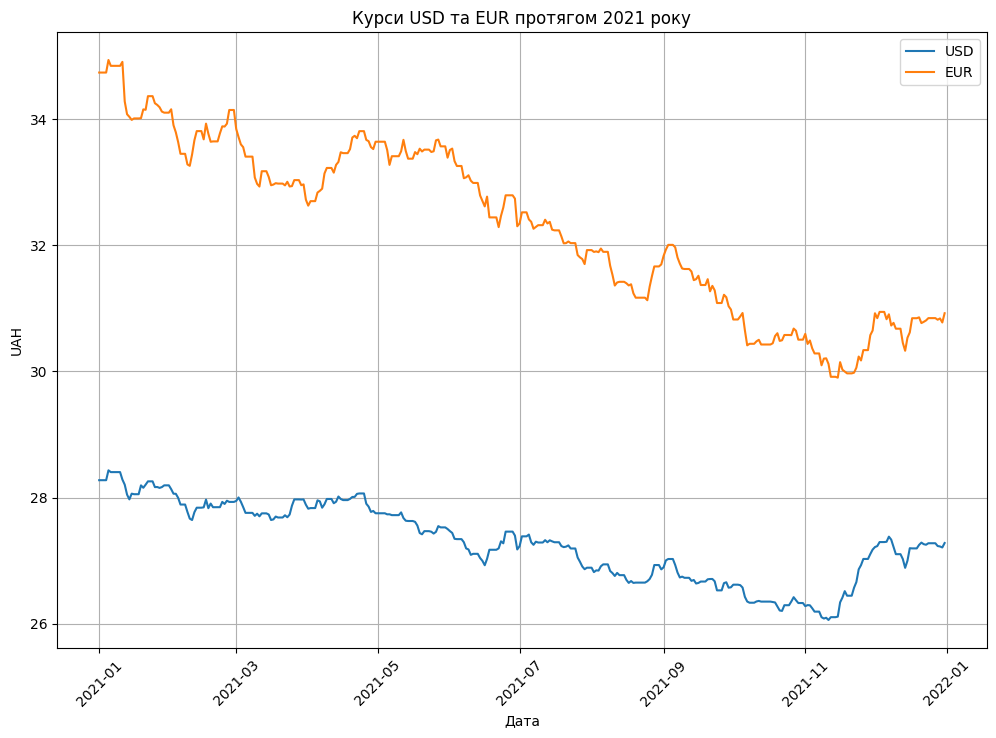

In [12]:
plt.figure(figsize=(12,8))

usd = df[df['CurrencyCodeL'] == 'USD']
eur = df[df['CurrencyCodeL'] == 'EUR']

plt.plot(usd['StartDate'], usd['Amount'], label='USD')
plt.plot(eur['StartDate'], eur['Amount'], label='EUR')

plt.xlabel('Дата')
plt.ylabel('UAH')
plt.title('Курси USD та EUR протягом 2021 року')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

#Зберігаємо графік
file_graph = "currency_plot.png"
plt.savefig(file_graph)

plt.show()

In [13]:
# Завантаження файлу з графіком у S3 бакет
with open(file_graph, 'rb') as file:
    s3.upload_fileobj(file, bucket_name, file_graph)

In [ ]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import io

bucket_name = 'bucket-kostia'
file_name = 'exchange_rates_2021.csv'

# Ініціалізація клієнта S3
s3 = boto3.client('s3')

# Завантажити файл від Amazon S3
response = s3.get_object(Bucket=bucket_name, Key=file_name)

# Прочитати вміст файлу
file_content = response['Body'].read().decode('utf-8')

# Зчитати CSV-файл у змінну
df = pd.read_csv(io.StringIO(file_content))

df.head()

df['StartDate'] = pd.to_datetime(df['StartDate'], format='%d.%m.%Y')

plt.figure(figsize=(12,8))

usd = df[df['CurrencyCodeL'] == 'USD']
eur = df[df['CurrencyCodeL'] == 'EUR']

plt.plot(usd['StartDate'], usd['Amount'], label='USD')
plt.plot(eur['StartDate'], eur['Amount'], label='EUR')

plt.xlabel('Дата')
plt.ylabel('UAH')
plt.title('Курси USD та EUR протягом 2021 року')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

#Зберігаємо графік
file_graph = "currency_plot.png"
plt.savefig(file_graph)

plt.show()

# Завантаження файлу з графіком у S3 бакет
with open(file_graph, 'rb') as file:
    s3.upload_fileobj(file, bucket_name, file_graph)